In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

housing = pd.DataFrame(pd.read_csv(".\\Housing.csv"))
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
housing.shape
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

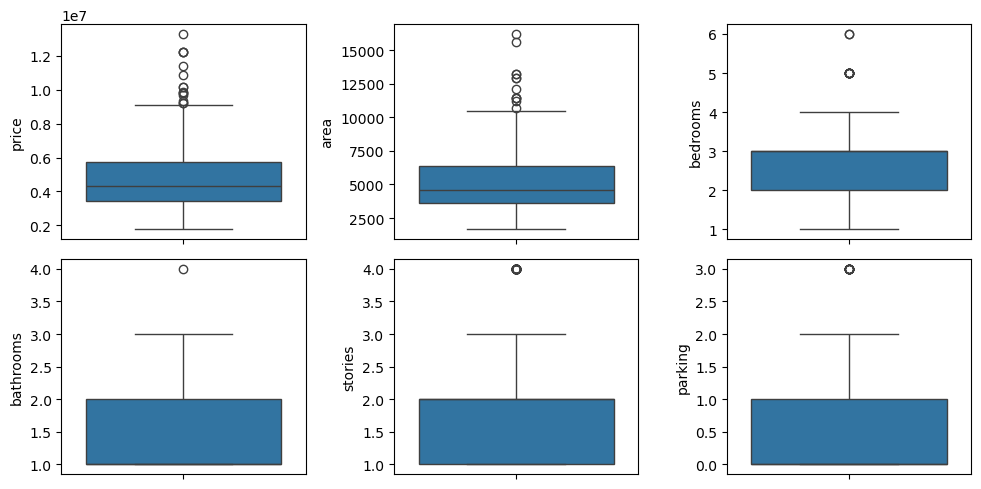

In [5]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

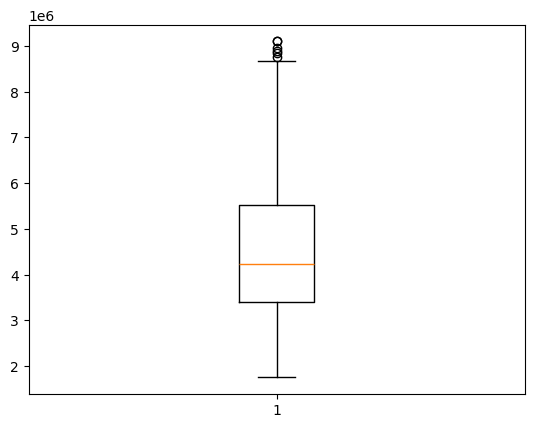

In [7]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

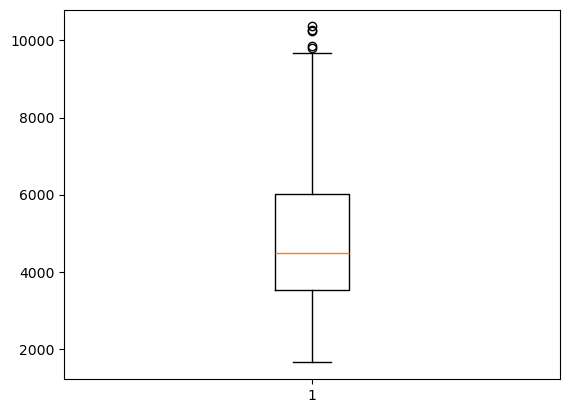

In [8]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

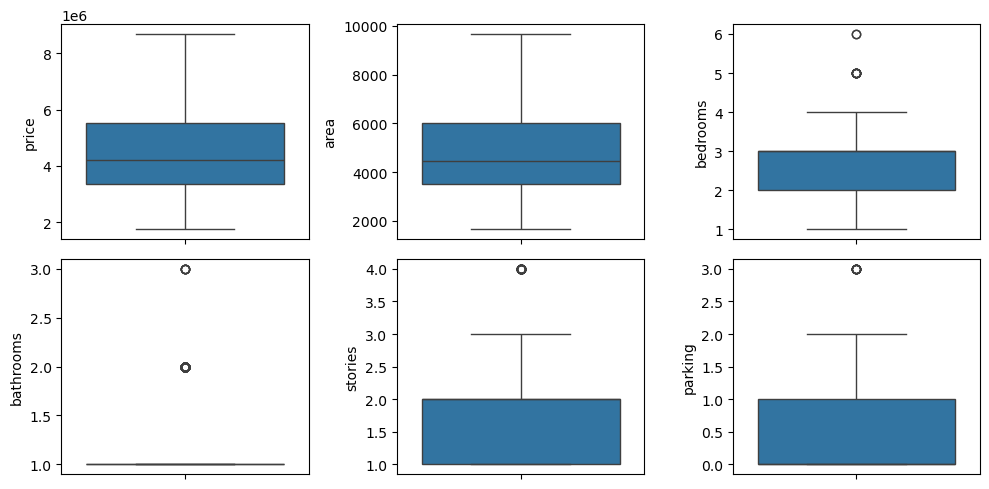

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

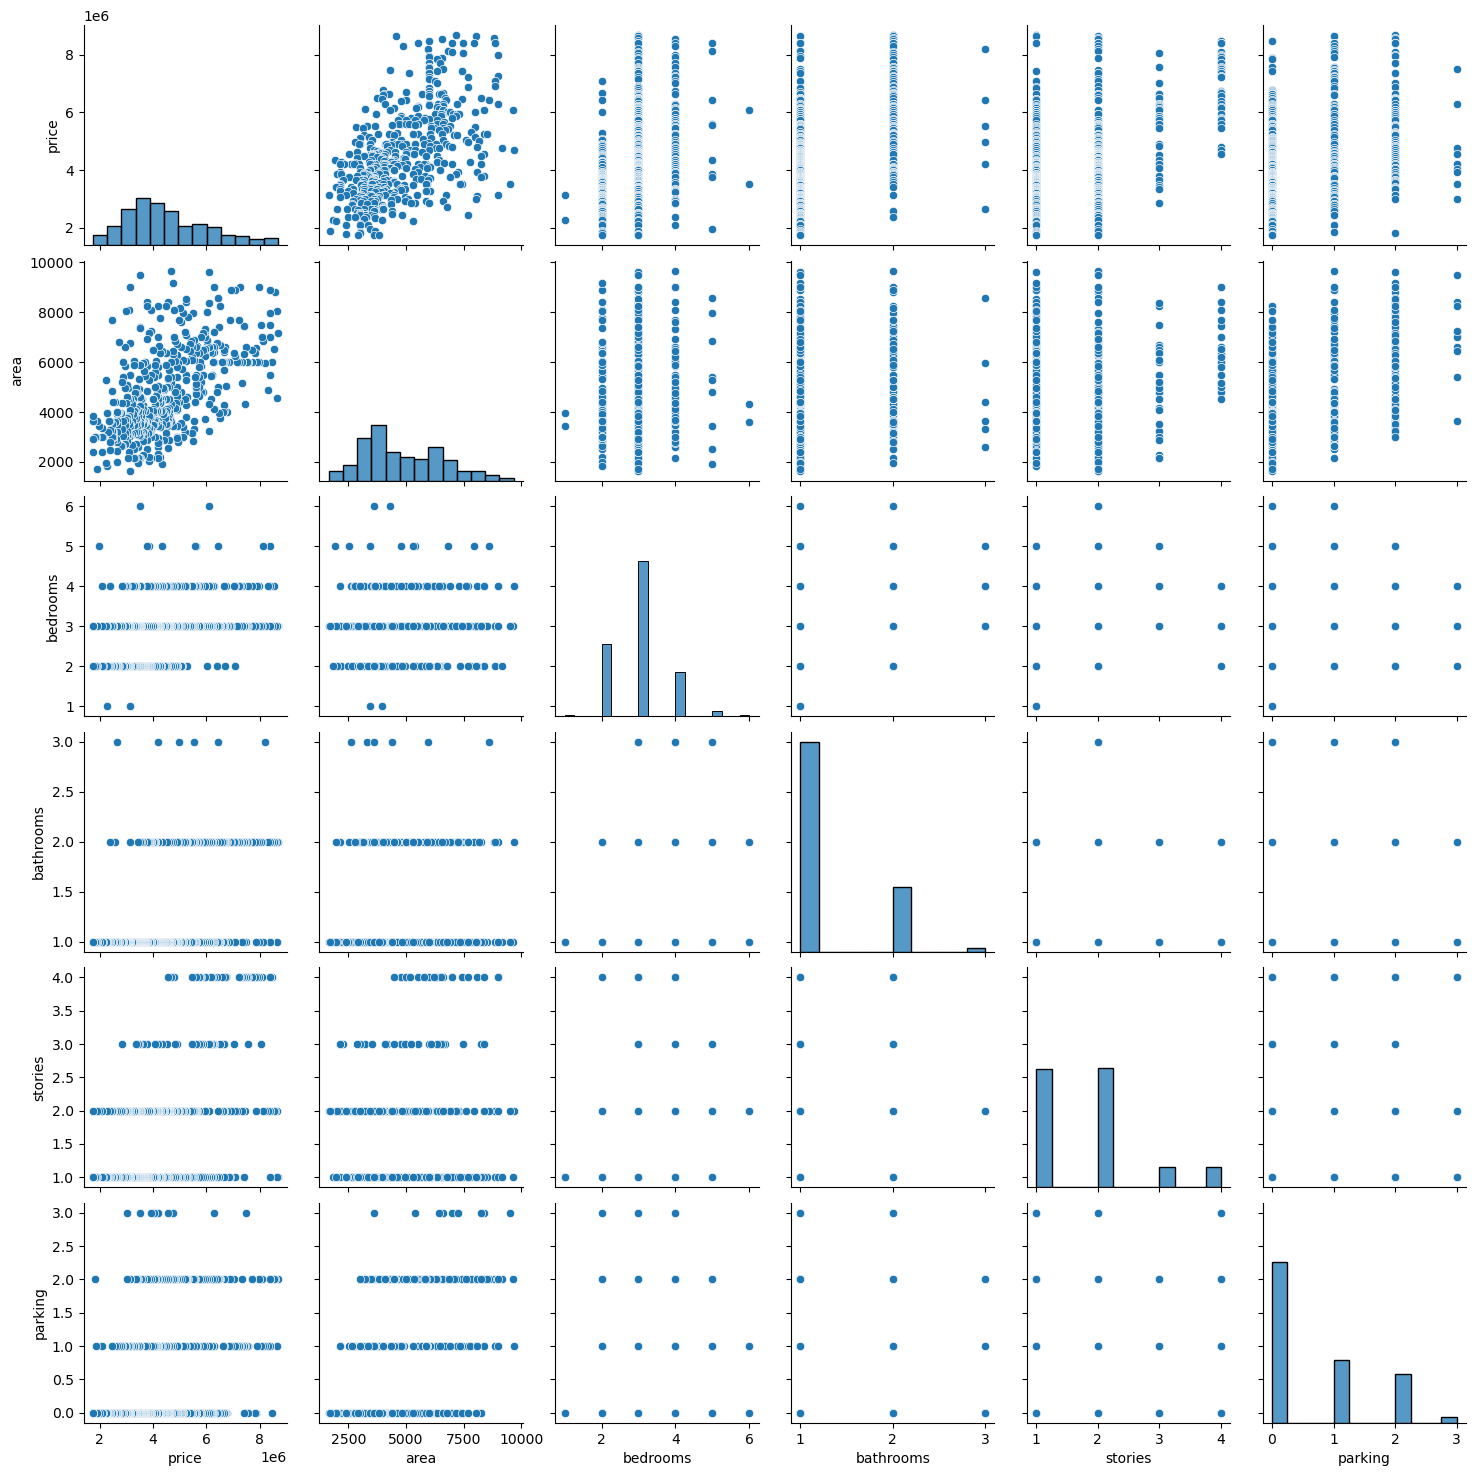

In [10]:
sns.pairplot(housing)
plt.show()

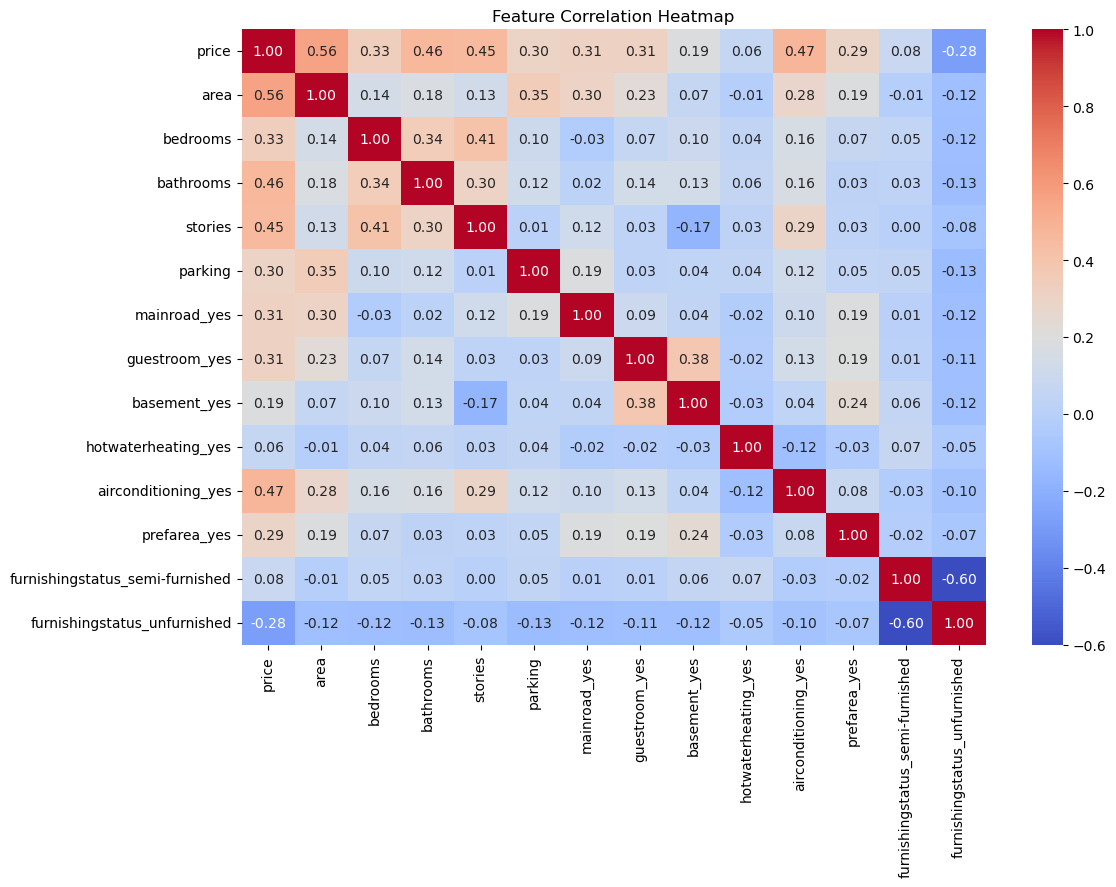

In [13]:
# Convert categorical columns to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(housing, columns=categorical_cols, drop_first=True)

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

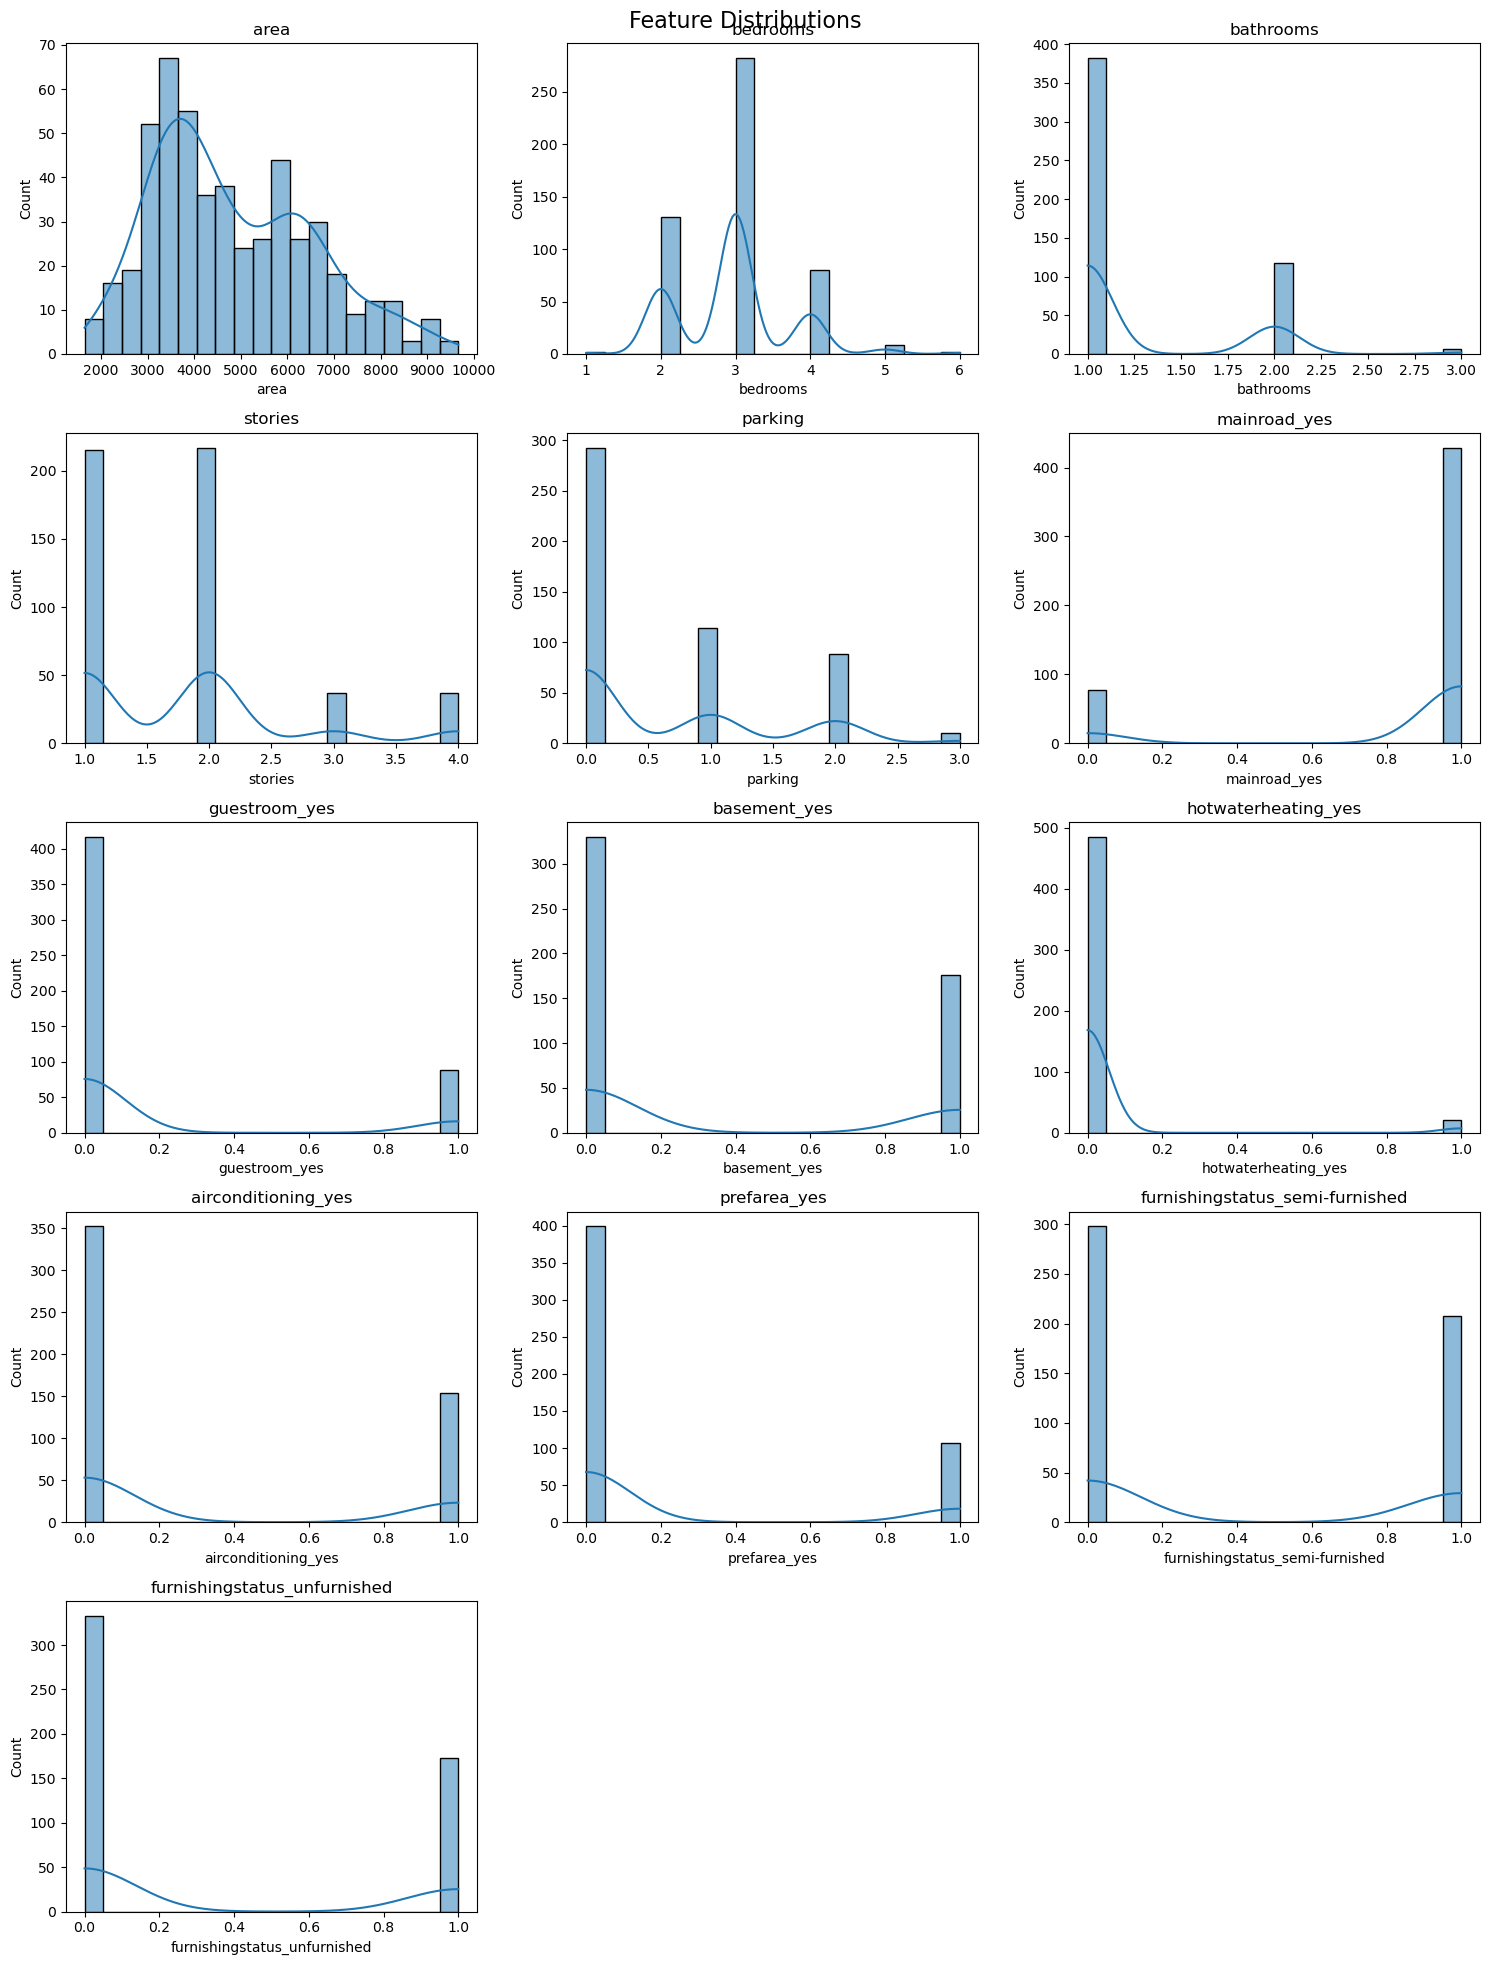

In [22]:
# Feature Distribution Plots
feature_columns = [col for col in df.columns if col != 'price']
n_features = len(feature_columns)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*5, n_rows*4))
fig.suptitle("Feature Distributions", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(feature_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature Selection: Separate independent variables (X) and target variable (y)
X = df.drop(columns=['price'])
y = df['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions using the model
y_pred = model.predict(X_test)

In [29]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation: Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 878537160529.69
R-squared: 0.69


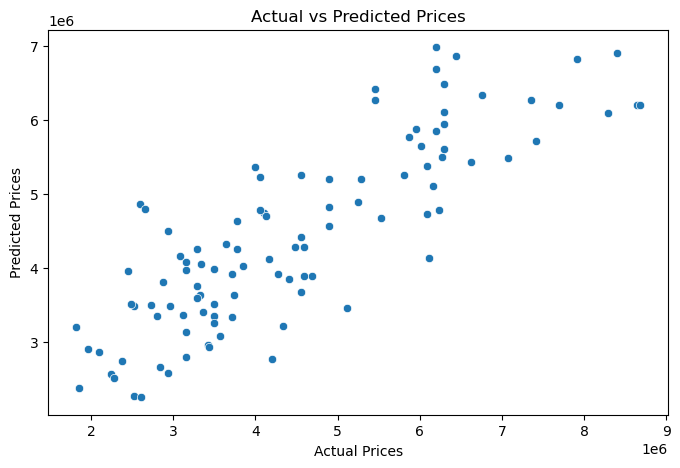

In [31]:
# Visualizing Model Performance: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


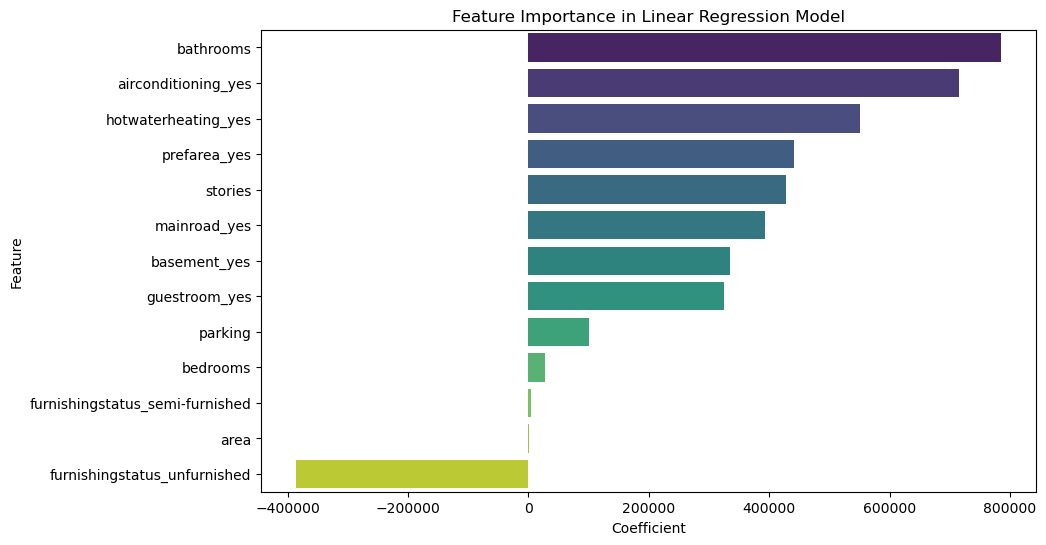

In [32]:
# Feature Importance: Visualize the model coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance in Linear Regression Model")
plt.show()

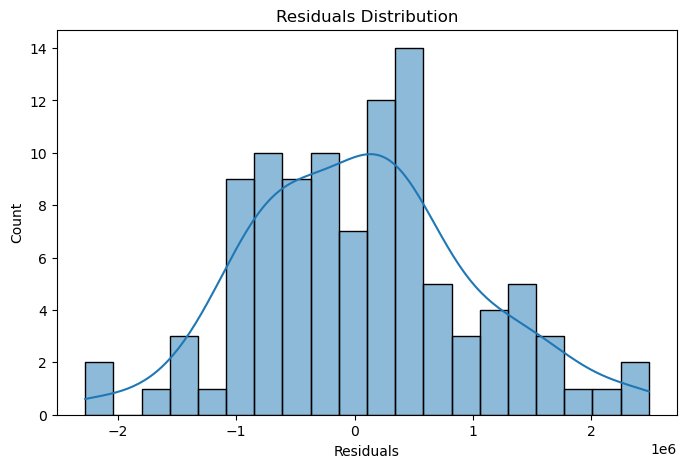

In [33]:
# Residual Analysis: Distribution of residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

In [34]:
# Additional Analysis: Correlation of features with Price
corr_with_price = df.corr()['price'].sort_values(ascending=False)
print("\nCorrelation of Features with Price:\n", corr_with_price)


Correlation of Features with Price:
 price                              1.000000
area                               0.558119
airconditioning_yes                0.474986
bathrooms                          0.464939
stories                            0.452348
bedrooms                           0.334538
guestroom_yes                      0.307619
mainroad_yes                       0.307564
parking                            0.298557
prefarea_yes                       0.288701
basement_yes                       0.191221
furnishingstatus_semi-furnished    0.083826
hotwaterheating_yes                0.061847
furnishingstatus_unfurnished      -0.281595
Name: price, dtype: float64


R-squared on scaled data: 0.70


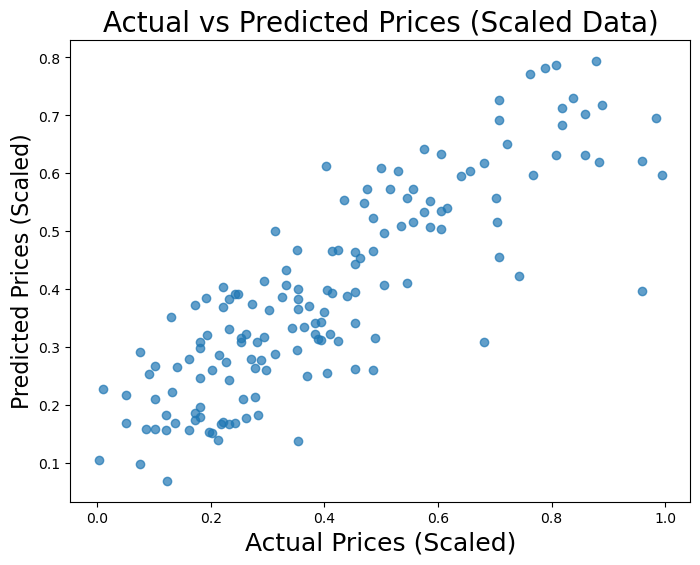

In [40]:
# Additional Scaling and Model Evaluation on Scaled Data

# Initialize the scaler
scaler = MinMaxScaler()

# Split the DataFrame 'df' into training (70%) and testing (30%) sets
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

# Define numeric columns for scaling
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# Scale numeric features on training data and apply same scaling on test data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Separate the target variable 'price' from the feature sets
y_train_scaled = df_train.pop('price')
y_test_scaled = df_test.pop('price')

# Train a new Linear Regression model on the scaled training data
model_scaled = LinearRegression()
model_scaled.fit(df_train, y_train_scaled)

# Make predictions on the scaled test data
y_pred_scaled = model_scaled.predict(df_test)

# Evaluate model performance using R-squared
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared on scaled data: {r2_scaled:.2f}")

# Plot actual vs. predicted prices for scaled data
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred_scaled, alpha=0.7)
plt.title("Actual vs Predicted Prices (Scaled Data)", fontsize=20)
plt.xlabel("Actual Prices (Scaled)", fontsize=18)
plt.ylabel("Predicted Prices (Scaled)", fontsize=16)
plt.show()
